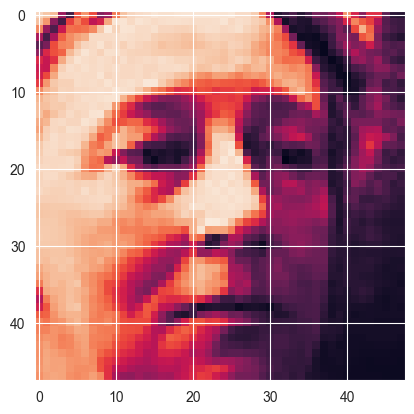

In [85]:
import os
data_dir = r'C:\Users\Artem\Desktop\data'
os.listdir(data_dir)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.image import imread
test_path = data_dir+'\\test\\'
train_path= data_dir+'\\train\\'
test_path
os.chdir(test_path)

os.listdir(train_path)
os.listdir(train_path+'sad')
sad_cell = train_path+'sad\\'+'Training_2913.jpg'
plt.imshow(imread(sad_cell))
surprise_cell =train_path+'surprise\\'+'Training_15950.jpg'

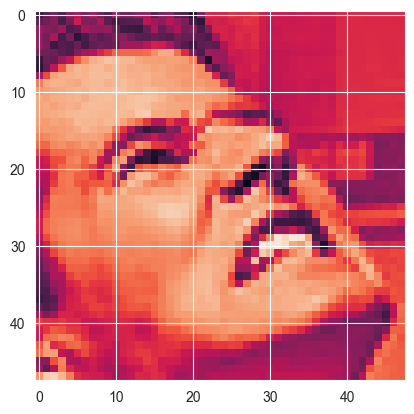

In [86]:
plt.imshow(imread(surprise_cell))

In [87]:
#pwd
len(os.listdir(train_path+'surprise'))

3171

In [88]:
len(os.listdir(test_path+'surprise'))

831

In [89]:
48*48


2304

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more infor

In [3]:
image_gen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1, height_shift_range=0.1, shear_range =0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest' )

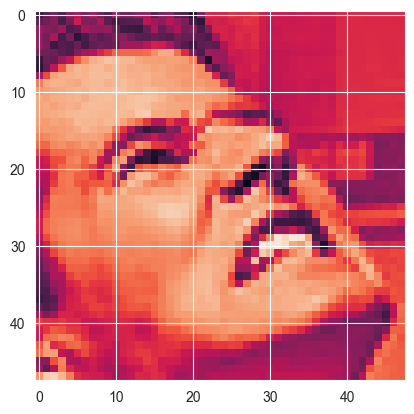

In [93]:
surprise_cell= plt.imshow(imread(surprise_cell))

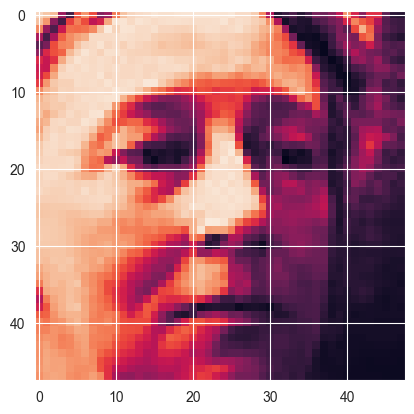

In [94]:
surp_img = imread(sad_cell)
plt.imshow(surp_img)

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten

In [96]:
model = Sequential()

In [97]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [98]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
batch_size = 48
train_image_gen = image_gen.flow_from_directory(train_path,color_mode='grayscale',target_size=(48,48),batch_size=batch_size,class_mode='binary')
test_image_gen = image_gen.flow_from_directory(test_path,color_mode='grayscale',target_size=(48,48),batch_size=batch_size,class_mode='binary',shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [99]:
train_image_gen.class_indices


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [100]:
import scipy
results = model.fit (train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/20
599/599 [==============================] - 490s 816ms/step - loss: -362905436160.0000 - accuracy: 0.0152 - val_loss: -1932493455360.0000 - val_accuracy: 0.0155
Epoch 2/20
599/599 [==============================] - 119s 199ms/step - loss: -11764556103680.0000 - accuracy: 0.0152 - val_loss: -30011786526720.0000 - val_accuracy: 0.0155
Epoch 3/20
599/599 [==============================] - 119s 199ms/step - loss: -71921567793152.0000 - accuracy: 0.0152 - val_loss: -132799835144192.0000 - val_accuracy: 0.0155
Epoch 4/20
599/599 [==============================] - 125s 208ms/step - loss: -232392795095040.0000 - accuracy: 0.0152 - val_loss: -362789310824448.0000 - val_accuracy: 0.0155
Epoch 5/20
599/599 [==============================] - 111s 185ms/step - loss: -540960190627840.0000 - accuracy: 0.0152 - val_loss: -767216584753152.0000 - val_accuracy: 0.0155
Epoch 6/20
599/599 [==============================] - 115s 192ms/step - loss: -1045952915832832.0000 - accuracy: 0.0152 - val_lo

In [ ]:
pred = model.predict_generator(test_image_gen)

In [ ]:
pred

In [9]:
np.save('my_history.npy',results.history)


NameError: name 'np' is not defined

In [114]:
pred = model.predict(test_image_gen)


150/150 [==============================] - 11s 75ms/step


In [116]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, None, None, 64)    640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, None, None, 64)    0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 64)    36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, None, None, 64)    0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [117]:
train_path.shape

AttributeError: 'str' object has no attribute 'shape'

In [1]:
help(ImageDataGenerator)

NameError: name 'ImageDataGenerator' is not defined

In [ ]:
from mss import mss
import cv2
from PIL import Image
import numpy as np

mon ={ "top": 100,  "left": 100, "width": 1600, "height": 1024}

sct = mss()

while 1:
    sct_img = sct.grab(mon)
    img = Image.frombytes("RGB", (sct_img.size.width, sct_img.size.height),sct_img.rgb)
    cv2.imshow("test",np.array(img) )
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

In [2]:
model=load_model(r'C:\Users\Artem\PycharmProjects\pythonProject\model\surovtsev3.h5')
accuracy = model.evaluate(test_image_gen)[1]
metrics = pd.DataFrame(model.history.history)

TypeError: Inputs to a layer should be tensors. Got 'C:\Users\Artem\PycharmProjects\pythonProject\model\surovtsev3.h5' (of type <class 'str'>) as input for layer 'sequential'.

In [1]:
from keras.src.saving.saving_api import load_model, load_weights
model = load_model(r'C:\Users\Artem\PycharmProjects\pythonProject\model\surovtsev3.h5')
predictions = model.predict(test_image_gen)

# Знаходимо середню абсолютну похибку між прогнозованими та реальними значеннями
mae = np.mean(np.abs(predictions - test_image_gen.labels))

print(f'Mean Absolute Error (MAE): {mae:.4f}')

NameError: name 'test_image_gen' is not defined

In [4]:
from keras.src.saving.saving_api import load_model, load_weights
model=load_model(r'C:\Users\Artem\PycharmProjects\pythonProject\model\surovtsev3.h5')
accuracy = model.evaluate(test_image_gen)[1]
metrics = pd.DataFrame(model.history.history)
from keras.src.saving.saving_api import load_model, load_weights
model = load_model(r'C:\Users\Artem\PycharmProjects\pythonProject\model\surovtsev3.h5')
predictions = model.predict(test_image_gen)

# Знаходимо середню абсолютну похибку між прогнозованими та реальними значеннями
mae = np.mean(np.abs(predictions - test_image_gen.labels))

print(f'Mean Absolute Error (MAE): {mae:.4f}')

NameError: name 'test_image_gen' is not defined

In [8]:
from keras.models import model_from_json
import pandas as pd

# Завантаження архітектури моделі з JSON-файлу
json_file = open(r'C:\Users\Artem\PycharmProjects\pythonProject\emotion_model1505.json')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

emotion_model.load_weights = (r"C:\Users\Artem\PycharmProjects\pythonProject\emotion_model1505.h5")

losses = pd.DataFrame(model.history.history)

AttributeError: 'NoneType' object has no attribute 'history'